In [292]:
import pandas as pd 
import numpy as np

In [293]:
sales_df = pd.read_csv("advertising.csv")

In [294]:
Y = np.array(sales_df['Sales'])

In [295]:
X1 = np.array(sales_df['TV'])
X2 = np.array(sales_df['Radio'])
X3 = np.array(sales_df['Newspaper'])

In [296]:
X1[0:5]

array([ 230.1,   44.5,   17.2,  151.5,  180.8])

# Normalize X and Y

In [297]:
Y = (Y - Y.mean())/Y.std()

In [298]:
X1 = (X1 - X1.mean())/X1.std()
X2 = (X2 - X2.mean())/X2.std()
X3= (X3 - X3.mean())/X3.std()

# Random initialization of beta

In [299]:
import random

In [300]:

def initialize_betas() : 
    b_0 = random.random()
    b_1 = random.random()
    b_2 = random.random()
    b_3 = random.random()
    return b_0,b_1,b_2,b_3

In [301]:
b_0, b_1, b_2, b_3 = initialize_betas()
b = np.array([ b_1, b_2, b_3])
b[0]

0.056049166074176648

In [302]:
X.shape

#b.shape

(3, 200)

In [329]:
def predict_Y(b_0, b, X):
    return np.matmul(X,b) +b_0
    #return np.array([b_0 + b[0] * X1 + b[1] * X2 + b[2] * X3 for X1,X2,X3 in X ])
    

In [330]:
X = np.array([X1,X2,X3])
y_hat = predict_Y(b_0,b.T,X.T)
y_hat[0:3]

array([ 2.33184829,  0.71360812,  1.0197113 ])

# Calculate cost (RMSE)

In [305]:
def get_cost(y, y_hat):
    y_resid = y - y_hat
    return np.sum(np.matmul(y_resid.T, y_resid))/ (2 * len(Y))

In [306]:
cost= get_cost(Y, y_hat)
cost

0.63082083008487011

In [307]:
def update_beta(b0,b,y, y_hat,x,  alpha = 0.01):
    d_b0 = np.sum(y_hat - y) / (len(Y))
    b0 = b0 - alpha * d_b0 
    
    d_b1 = np.dot(y_hat - y, x[0]) / (len(Y))
    b[0] = b[0] - alpha * d_b1
    
    d_b2 = np.dot(y_hat - y, x[1]) / (len(Y))
    b[1] = b[1] - alpha * d_b2
    
    d_b3 = np.dot(y_hat - y, x[2]) / (len(Y))
    b[2] = b[2] - alpha * d_b3
    
    return b0, b

In [308]:
update_beta(b_0, b,Y, y_hat, X )

(0.74410424684545451, array([ 0.06282985,  0.48791963,  0.3734251 ]))

# Gradient Descent Algorithm

In [331]:
num_iterations = 2000
alpha = 0.1
all_costs = []
all_b0 = []
all_b1 = []
all_b2 = []
all_b3 = []

b0,b1,b2,b3 = initialize_betas()
all_b0.append(b0)
all_b1.append(b1)
all_b2.append(b2)
all_b3.append(b3)

b = np.array([b1,b2,b3])

for each_iter in range(num_iterations):
    y_hat = predict_Y(b0,b.T,X.T)
    current_cost = get_cost(Y, y_hat)
    b0,b = update_beta(b0, b,Y, y_hat, X )
    
              
    all_costs.append(current_cost)
    all_b0.append(b0)
    all_b1.append(b[0])
    all_b2.append(b[1])
    all_b3.append(b[2])

    #print('IterCost: ', each_iter, 'Cost: ', current_cost)
    
print('b_0: ', b0, 'b_1:',b1, 'b_2:',b2, 'b_3:',b3)
              


b_0:  2.06034508924e-10 b_1: 0.9545617098798079 b_2: 0.35011722447997007 b_3: 0.6046213394903838


In [333]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

lmodel =lreg.fit(X.reshape(len(Y), 3), Y.reshape(len(Y), 1))

lmodel.intercept_

array([-0.00272926])

In [334]:
lmodel.coef_

array([[-0.04957859,  0.10452946, -0.01318526]])

In [335]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

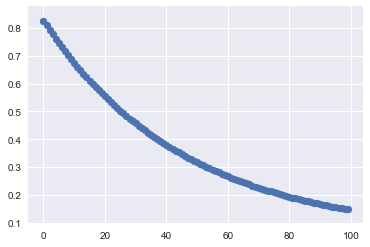

In [314]:
plt.scatter(range(num_iterations),all_costs)

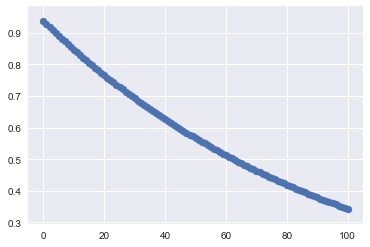

In [315]:
plt.scatter(range(num_iterations +1),all_b0)

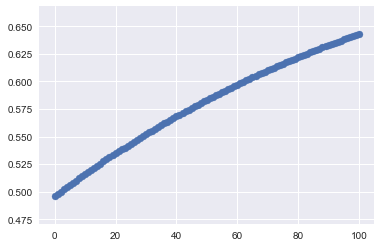

In [316]:
plt.scatter(range(num_iterations +1),all_b1)

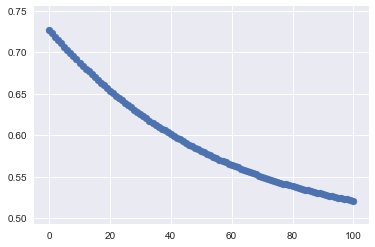

In [317]:
plt.scatter(range(num_iterations +1),all_b2)

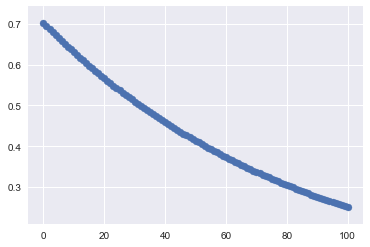

In [318]:
plt.scatter(range(num_iterations +1),all_b3)